In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from glob import glob
import pickle
from tqdm import tqdm

from utils import FEATURES_DIR, RESULTS_DIR
from analyses.ridge_regression_decoding import NUM_CV_SPLITS, GLM_OUT_DIR
from notebook_utils import load_results_data

/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
all_data = load_results_data()
all_data

,alpha,model,subject,features,training_mode,testing_mode,fold,best_val_loss,best_val_acc,metric,value
0,1.0,clip_avg,sub-01,avg,train,test,0.0,False,False,val_loss,0.949708
1,1.0,clip_avg,sub-01,avg,train,test,0.0,False,False,val_rsa,0.031339
2,1.0,clip_avg,sub-01,avg,train,test,0.0,False,False,rsa,0.189683
3,1.0,clip_avg,sub-01,avg,train,test,0.0,False,False,acc_cosine,0.867081
4,1.0,clip_avg,sub-01,avg,train,test,0.0,False,False,acc_cosine_captions,0.831884
...,...,...,...,...,...,...,...,...,...,...,...
1561,1.0,clip_avg,sub-07,avg,train,test,4.0,False,False,rsa,0.207281
1562,1.0,clip_avg,sub-07,avg,train,test,4.0,False,False,acc_cosine,0.876398
1563,1.0,clip_avg,sub-07,avg,train,test,4.0,False,False,acc_cosine_captions,0.816356
1564,1.0,clip_avg,sub-07,avg,train,test,4.0,False,False,acc_cosine_images,0.948033


In [13]:
def add_avg_subject(df):
    df_mean = df.copy()
    df_mean["subject"] = "average"
    df = pd.concat((df.copy(), df_mean))
    return df

distance_metric = 'cosine'
METRICS = [f'acc_{distance_metric}', f'acc_{distance_metric}_captions', f'acc_{distance_metric}_images']

def plot_test_metrics(data, hue_variable="model", metrics=METRICS, ylim=(0.5, 1)):
    data_filtered = data[data.metric.isin(metrics)]
    # data_filtered = data
    data_filtered = add_avg_subject(data_filtered)

    sns.set_style("ticks", {'axes.grid' : True})
    g = sns.catplot(data_filtered, kind="bar", x="subject", y="value", col="metric", height=4, aspect=1, hue=hue_variable)#, palette="Set3"
    g._legend.remove()
    g.fig.legend(loc='upper left', title="", bbox_to_anchor=(1, 0.9)) # ,ncol=2

    g.set(ylim=ylim)
    
    plt.suptitle("Test Performance", fontsize=16)
    plt.tight_layout()
    
    plt.savefig(os.path.join(RESULTS_DIR, f"model_comparison_{metrics[0]}.png"), dpi=300)



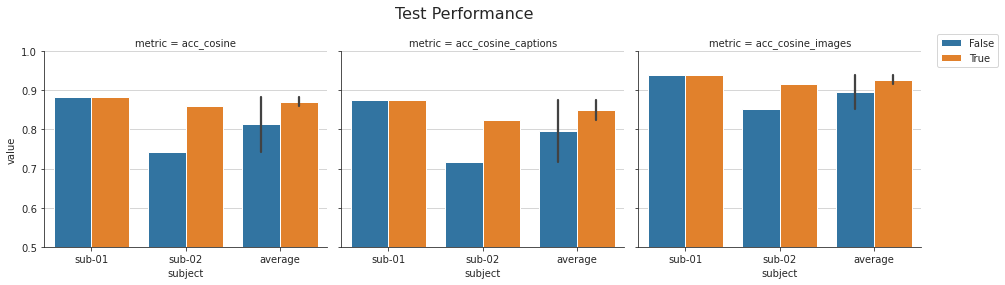

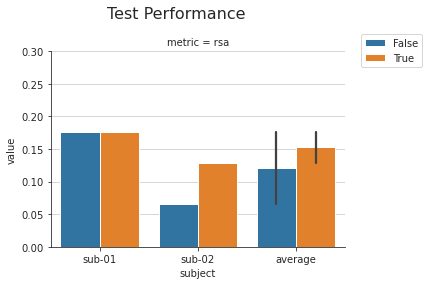

In [14]:
data_to_plot = all_data

data_to_plot = data_to_plot[(data_to_plot.best_val_acc == True) | (data_to_plot.best_val_loss == True)]

# data_to_plot = data_to_plot[data_to_plot.best_val_acc == True]
# data_to_plot = data_to_plot[data_to_plot.best_val_loss == True]

data_to_plot = data_to_plot[data_to_plot.subject.isin(['sub-01', 'sub-02'])]
data_to_plot = data_to_plot[data_to_plot.model.isin(['clip_avg'])]

plot_test_metrics(data_to_plot, hue_variable="best_val_acc")
plot_test_metrics(data_to_plot, hue_variable="best_val_acc", metrics=["rsa"], ylim=(0, 0.3))

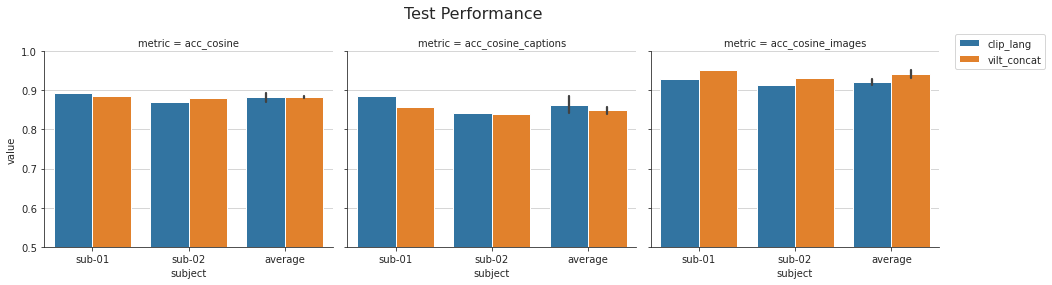

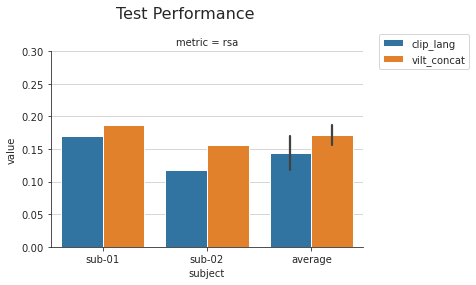

In [15]:
data_to_plot = all_data

data_to_plot = data_to_plot[data_to_plot.best_val_acc == True]
# data_to_plot = data_to_plot[data_to_plot.best_val_loss == True]

data_to_plot = data_to_plot[data_to_plot.subject.isin(['sub-01', 'sub-02'])]
data_to_plot = data_to_plot[data_to_plot.model.isin(['clip_lang', 'vilt_concat'])]

plot_test_metrics(data_to_plot)
plot_test_metrics(data_to_plot, metrics=["rsa"], ylim=(0, 0.3))

In [6]:
all_data[all_data.best_val_loss == True].alpha.unique()

array([  100000., 10000000.])